# matplotlib - plotting in Python

27 August 2024

by Brian Fiedler,  [Adapted from J.R. Johansson Lecture 4](http://github.com/jrjohansson/scientific-python-lectures).

I have followed some of Johansson's tutorial, but I have expunged `pylab` completely. 

`pylab` has become unfashionable. Here is why:

* [No Pylab Thanks](http://carreau.github.io/posts/10-No-PyLab-Thanks.ipynb.html)
* [Although many examples use pylab, it is no longer recommended.](http://matplotlib.org/faq/usage_faq.html#matplotlib-pyplot-and-pylab-how-are-they-related)
* [it's worth paying the price of slightly more verbose code with explicit imports](http://mail.scipy.org/pipermail/ipython-dev/2014-March/013411.html)

So hopefully you will NOT see this `import` statement in my programs for METR 4323:
````python
from pylab import *
```
But beware that you might bump into `pylab` in many online examples and tutorials for plotting with matplotlib.

From Johansson: 

>>"The good thing about ...pylab... is that it is easy to get started with if you are familiar with MATLAB, and it has a minumum of coding overhead for simple plots. 
>>
However, I'd encourage not to use ...pylab... for anything but the simplest figures.
>>
Instead I recommend learning and using matplotlib's object-oriented plotting API. It is remarkably powerful and for advanced figures, with subplots, insets and other components it is very nice to work with."

# About matplotlib (from Johansson)

>>Matplotlib is an excellent 2D and 3D graphics library for generating scientific figures. Some of the many advantages of this library includes:
>>
>>* Easy to get started
* Support for $\LaTeX$ formatted labels and texts
* Great control of every element in a figure, including figure size and DPI. 
* High-quality output in many formats, including PNG, PDF, SVG, EPS.
* GUI for interactively exploring figures *and* support for headless generation of figure files (useful for batch jobs).

>>One of the of the key features of matplotlib that I would like to emphasize, and that I think makes matplotlib highly suitable for generating figures for scientific publications is that all aspects of the figure can be controlled *programmatically*. This is important for reproducibility, convenient when one need to regenerate the figure with updated data or changes its appearance. 

>>More information at the Matplotlib web page: http://matplotlib.org/"



In [4]:
print(2/3,2//3) # if you see (0,0), you are in python2

0.6666666666666666 0


In [5]:
from __future__ import print_function
from __future__ import division
print(2/3,2//3) # if your see 0.666666666667 0, you are at least emulating python 3

0.6666666666666666 0


#Starting to plot
In METR 4323, I will strive to import the `matplotlib.pyplot` and `numpy` modules the recommended "tidy" way (I do not use `import *`).

In [7]:
import matplotlib.pyplot as plt

And, when using an ipython notebook (as opposed to a "program")  I use the "magic" command (the prepended % indicates magic) to display images "inline" within the notebook, rather than in a pop-up window:

In [9]:
%matplotlib inline

An OPTIONAL statement to increase default font size:

In [11]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

Let's check for namespace pollution. We are trying to avoid that. If the next statement produces bloated output (100s of names, rather than approximately 25), perhaps `pylab` was imported by the default. That might happen if you run this at a http://wakari.io accounts.  

In [13]:
print('number of names:',len(dir()))
print(dir())

number of names: 57
['In', 'Out', '_', '_1', '_10', '_12', '_2', '_3', '_6', '_8', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__pandas', '__session__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i2', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'dataframe_columns', 'dataframe_hash', 'division', 'dtypes_str', 'exit', 'get_dataframes', 'get_ipython', 'getpass', 'hashlib', 'import_pandas_safely', 'is_data_frame', 'json', 'matplotlib', 'open', 'plt', 'print_function', 'quit']


<hr style="height: 10px; background-color: #006;" />
Let's make some lists to plot, using that really cool Python feature [list comprehensions](http://carlgroner.me/Python/2011/11/09/An-Introduction-to-List-Comprehensions-in-Python.html)

In [15]:
x = [.5*i for i in range(0,11)]
p = [i**2 for i in x ]
q = [i**1.8 for i in x]
print('x:',x)
print('p:',p)
print('q:',q)

x: [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
p: [0.0, 0.25, 1.0, 2.25, 4.0, 6.25, 9.0, 12.25, 16.0, 20.25, 25.0]
q: [0.0, 0.2871745887492587, 1.0, 2.0747428008338873, 3.4822022531844965, 5.203457546261707, 7.224674055842076, 9.535039134001844, 12.125732532083186, 14.989340485729711, 18.11949159194239]


Next we make a plot with one function call. This is the *bad* way to do it. (BTW,  the ";" prevents some default output from the cell. You can try removing the ";")

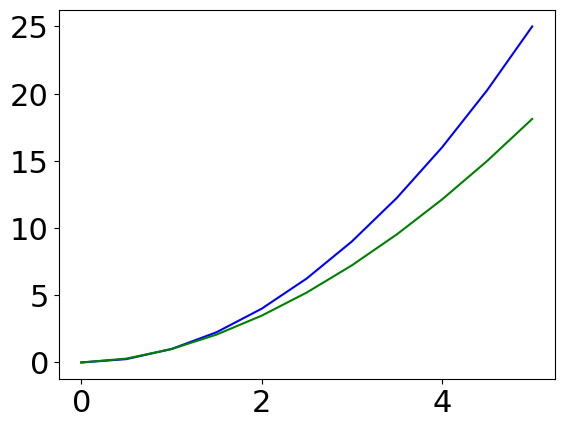

In [17]:
plt.plot(x,p,'b',x,q,'g');

For the above plot, there is no *reference* (meaning variable name) assigned to the plot object (a.k.a. plot instance). 

Below we demonstrate storing a *reference* to the newly created figure instance in a variable named `myfig`, and from it we create a new axis instance, here named `myaxes`, using the `add_axes` method in the `Figure` class instance `myfig`.

*Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure. We also safely apply object-oriented methods that are allowed only with the particular objects.*

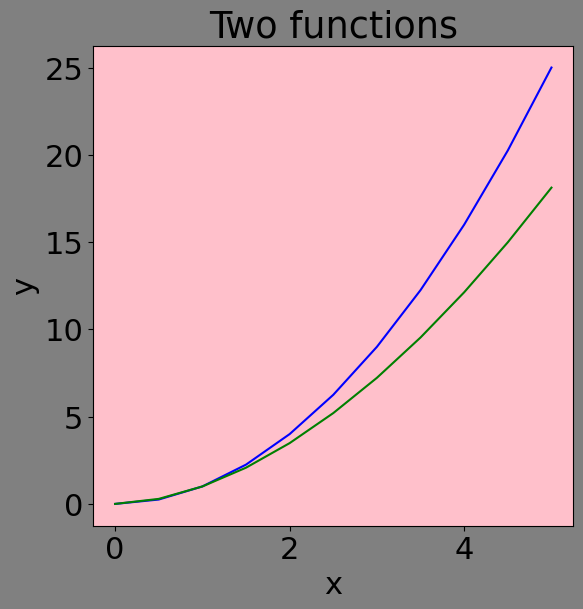

In [19]:
myfig = plt.figure(facecolor='grey',figsize=(6,6))
myaxes = myfig.add_axes([0.1, 0.1, 0.8, 0.8])
myaxes.set_facecolor('pink')
myaxes.plot(x, p, 'b',x,q,'g')
myaxes.set_xlabel('x')
myaxes.set_ylabel('y')
myaxes.set_title('Two functions');

Here is how to use `subplots` to return both the figure instance and the axes instance. In fact, we have TWO instances of an axes. Note the practice of prepending `r` before the strings that contain [mathtex](http://matplotlib.org/users/mathtext.html#mathtext-tutorial).  (The prepended `r` becomes essential when the string contains certian backslashes, as seen later. Here it is not essential).

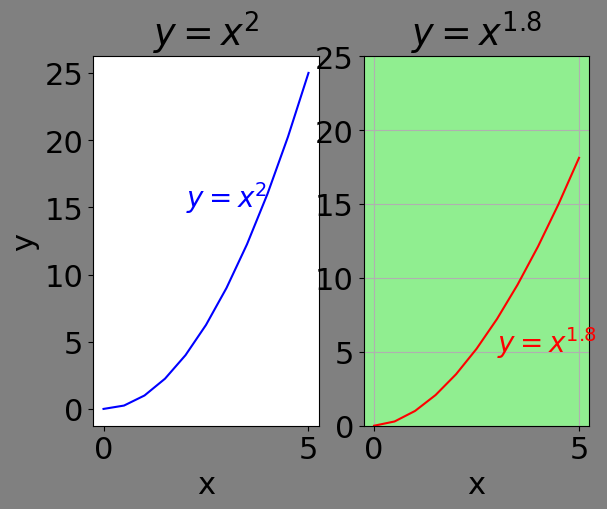

In [21]:
figx, axesx = plt.subplots(nrows=1, ncols=2, facecolor='grey')
axesx[0].plot(x, p, 'b')
axesx[1].plot(x, q, 'r')
axesx[0].set_xlabel('x')
axesx[1].set_xlabel('x')
axesx[0].set_ylabel('y')
axesx[0].set_title(r'$y=x^2$')
axesx[1].set_title(r'$y=x^{1.8}$')
axesx[1].set_ylim(0,25) # optional, user-defined y axis
axesx[1].grid()
axesx[1].set_facecolor('lightgreen')
axesx[0].text(2, 15, r"$y=x^2$", fontsize=20, color="blue") # is the r needed?
axesx[1].text(3, 5, r"$y=x^{1.8}$", fontsize=20, color="red");

A *hack* in programming will be defined here as using a programming feature to produce a favorable result, in a way for which the feature was not originally intended.  Thus we use `subplots`, without passing `nrows` or `ncols`, to produce ONE plot.  The slight advantage here is that we get both the *figure* instance and *axes* instance in one line:

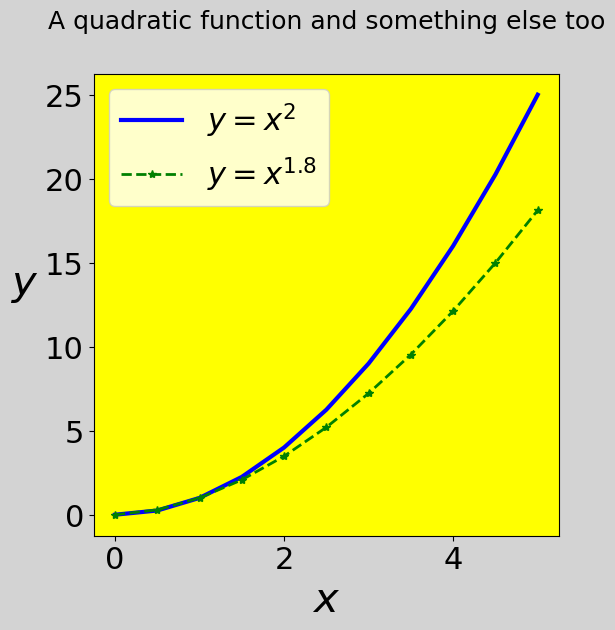

In [23]:
myfig, myaxes =plt.subplots(facecolor='lightgrey',figsize=(6,6))
myaxes.set_facecolor('yellow')
myaxes.plot(x, p, 'b',linewidth=3,label=r"$y=x^2$")
myaxes.plot(x, q, 'g*--',linewidth=2,label=r"$y=x^{1.8}$")
myaxes.set_xlabel(r'$x$',fontsize=30)
myaxes.set_ylabel(r'$y$',fontsize=30,rotation=0)
myaxes.yaxis.set_label_coords(-.15, 0.5) # adjust by experimenting
myaxes.set_title('A quadratic function and something else too',y=1.08,fontsize=18)
myaxes.legend(loc=2) # loc=2 is upper left
#also export the image to a file:
myfig.savefig('myfig.png',dpi=144)

Here is some weirdness. We call `subplot`, which is distinct from `subplots`. And the axes don't have names. Bad style...I don't like it.

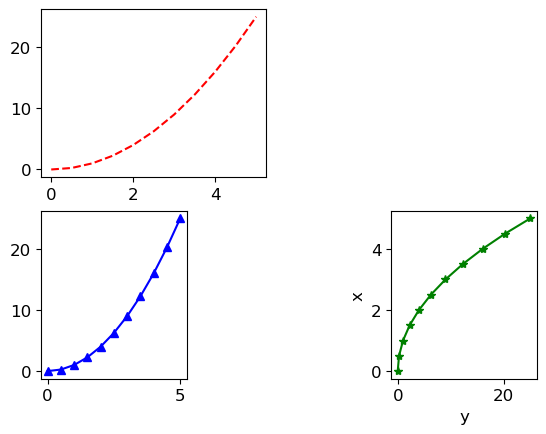

In [25]:
matplotlib.rcParams.update({'font.size': 12}) # shrink default font
plt.subplot(2,2,1) # 2 rows, 2 columns, use 1st axis
plt.plot(x, p, 'r--')
plt.subplot(2,3,6) # change to 3 columns, use 6th axis
plt.plot(p, x, 'g*-')
plt.xlabel('y')
plt.ylabel('x')
plt.subplot(234) # weird! no commas!!
plt.plot(x,p,'b^-');

Below is a way to make multiple axes without calling subplots:

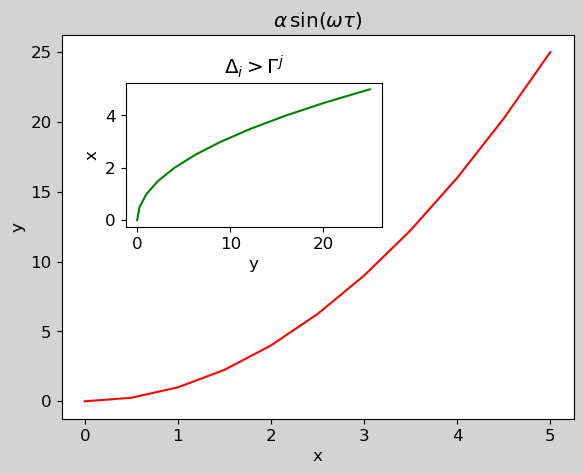

In [27]:
fig = plt.figure(facecolor='lightgrey')

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes
axes1.plot(x, p, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title(r'$ \alpha\/ \sin(\omega\tau)$') # the \/ means a gap

axes2.plot(p, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title(r'$\Delta_i > \Gamma^j$');

#Student Task Here!

Revisit [my emulated python program](https://trinket.io/python/2ad8c010ef).  I opened a cell below, and cut and paste the entire program into it. It should run and make a plot.

* As a cell in this notebook, the `import matplotlib.pyplot as plt` is not really needed. The import was already done, but doing the import again doesn't do any harm.
* Using **tab** at trinket.io puts in 2 spaces, rather than the 4 spaces common for most python editors, including this notebook. When we cut and paste, we still see 2 spaces for indentation.  The indentation within the entire cell is consistent, so no error is produced.  But when we try to edit the cell, we need to suffer a bit to make a consistent identation.

**Your task:**

1. The trinket coding style  has no explict figure or axes instance.  This is not the recommended style for METR 4323. *So fix that.*
1. `set_ylim` does not work at trinket, thus the "hack".  *Replace the hack with a call to `set_ylim`*
1. *Fix the 1st step in the Adams-Bashforth scheme, as stated in the comments within the code*
1. A lot of information is crammed into the title. `legend` is not supported at trinket. So make a better looking plot (with your improved Adams-Bashforth scheme) that is properly anotated and informative. Make the plot for `dt=.75`, and indicate that fact in an annotation.



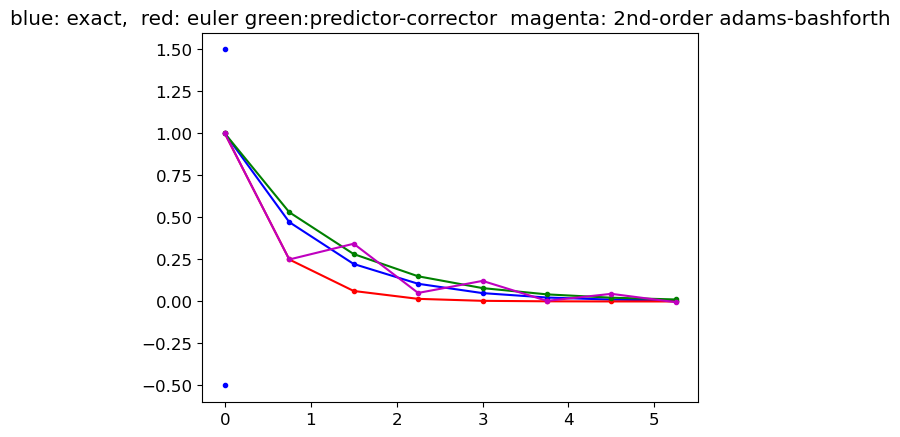

In [29]:
# Press the Run triangle above
# METR 4323 students: there are two challenges below,
# indicated by the text "STUDENTS"
import math
import matplotlib.pyplot as plt
# solves dx/dt = -x using numerical methods,
# and compares with the exact solution
xi = 1.0 # initial value for x
ti = 0. # initial value for t
tstop = 5. # stop when t > tstop
dt = .75 # discrete time step. STUDENTS: Try .5, .75, 1.1
# grow some lists of discrete solutions:
xe = [xi] # xe will store the euler predictions for x(t)
xx = [xi] # xx will store the exact solutions for x(t)
xa = [xi] # xa will store the 2nd-order Adams-Bashforth for x(t)
xp = [xi] # xp will store the predictor-corrector solutions for x(t)
td = [ti] # ta will store the discrete values of time
#### euler method
x=xi
t=ti
while t < tstop + 0.1*dt:
  dxdt = -x
  dx = dxdt*dt
  x = x + dx
  t = t + dt
  xexact = math.exp(-t)
  xe.append(x)
  td.append(t)
  xx.append(xexact)
#### predictor corrector-method
x=xi
t=ti
while t < tstop + 0.1*dt:
  dxdt1 = -x
  x1 = x + dxdt1*dt # euler prediction for x
  dxdt2 = -x1 # prediction for dxdt at future time
  x = x + .5*(dxdt1+dxdt2)*dt # corrected prediction for x
  t = t + dt
  xp.append(x)
### 2nd order adams-bashforth
# This is a multi-step method, which relies on saving the value
# of dxdt from the previous time step. The blending with
# coefficients of 1.5 and -0.5 may be mysterious to you.
# The first time-step is a special case, because there is no
# value of dxdt saved. There is a challenge below to improve
# on the first step.
x=xi
t=ti
dxdtp = None # will be saved value of dxdt from previous step
while t < tstop + 0.1*dt:
  dxdt = -x
  if dxdtp == None: # dxdtp not saved from previous step
    x = x + dxdt*dt # so first step allows for Euler
#STUDENTS: 
# can you improve the above into a predictor-corrector step?
  else: # dxdtp is available from previous time
    x = x + (1.5*dxdt -.5*dxdtp)*dt # blend for 2nd-order accuracy
  t = t +dt
  xa.append(x)
  dxdtp=dxdt

plt.plot(td,xx,'b.-')
plt.plot(td,xe,'r.-')
plt.plot(td,xp,'g.-')
plt.plot(td,xa,'m.-')
plt.plot([0,0],[-.5,1.5],'b.') # hack to make y axis go from -.5 to 1.5

plt.title('blue: exact,  red: euler green:predictor-corrector  \
magenta: 2nd-order adams-bashforth')
plt.show()